In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
savefig_path = os.path.join(lib_path, "figures", "/article_JCP_en/figures/")
save_fig = False

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)
rc("font", size=18)
rc("legend", fontsize=16)

# Test des différents opérateurs en WENO

In [9]:
n_lim = 10**8
t_fin_lim = 0.002

In [10]:
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_ref = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=0.9 * 10**-5,
    schema="weno",
    time_scheme="euler",
    phy_prop=phy_prop,
    cfl=0.5,
    fo=1.0,
)
num_prop_ref = NumericalProperties(
    dx=2.0 * 10**-5,
    schema="weno",
    time_scheme="euler",
    phy_prop=phy_prop,
    cfl=0.5,
    fo=1.0,
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.005)

<IPython.core.display.Javascript object>


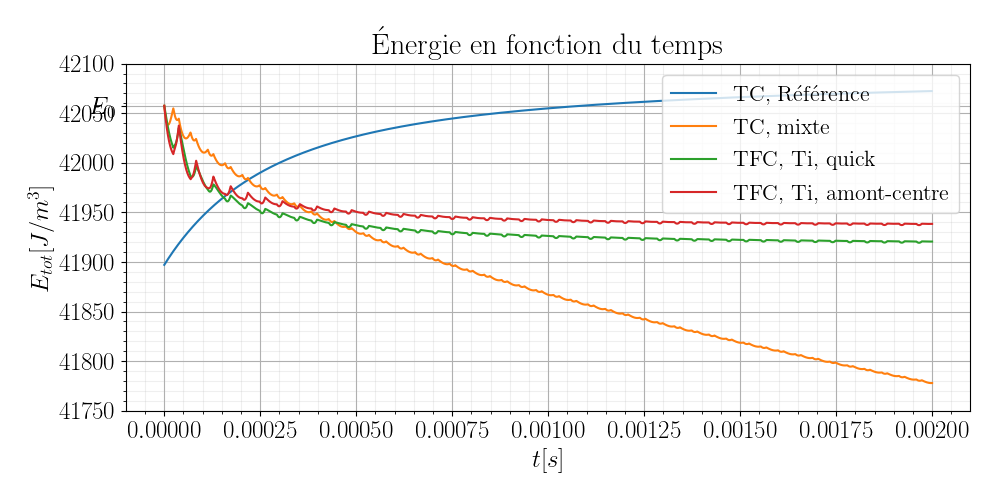

dt fourier
1.8172585062055175e-06
Référence


<IPython.core.display.Javascript object>


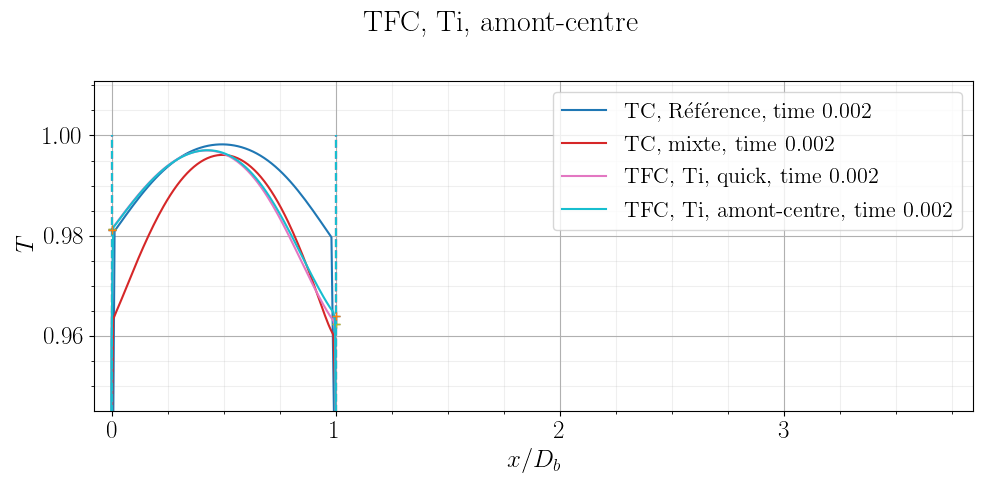

<IPython.core.display.Javascript object>


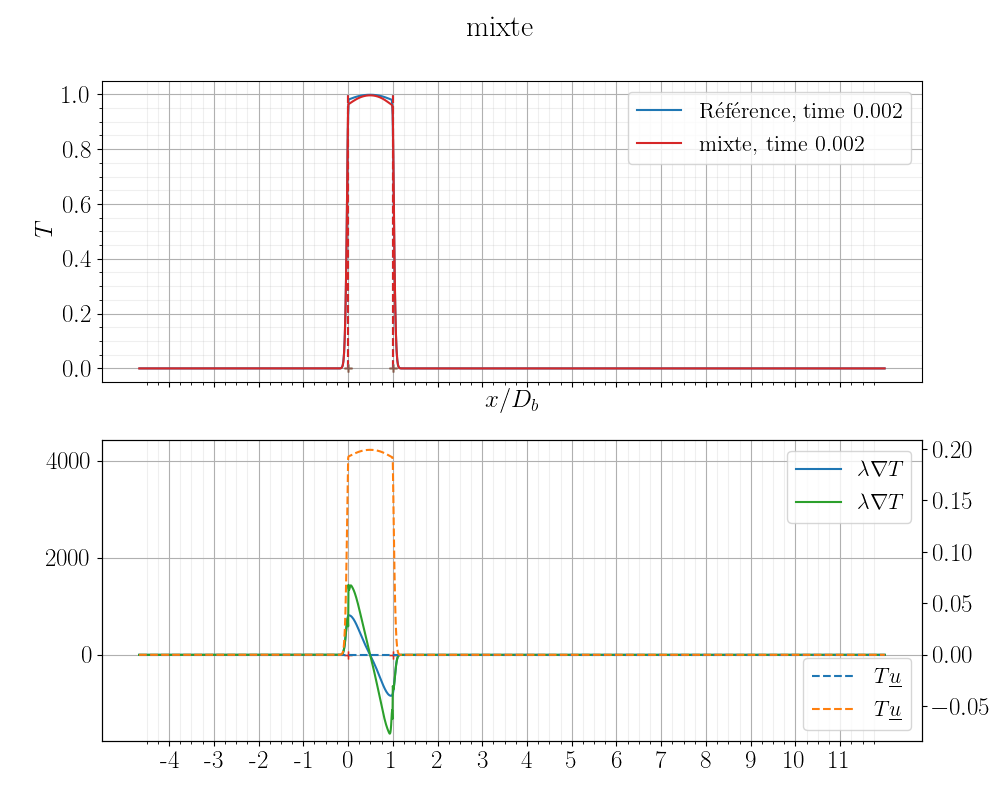

<IPython.core.display.Javascript object>


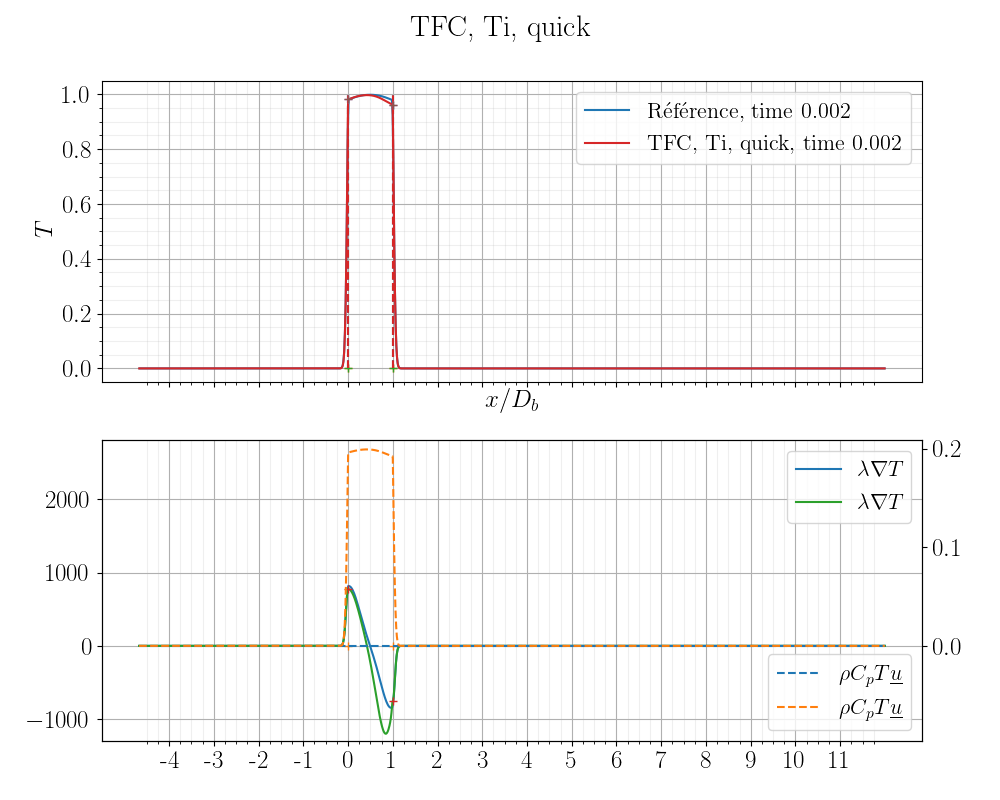

<IPython.core.display.Javascript object>


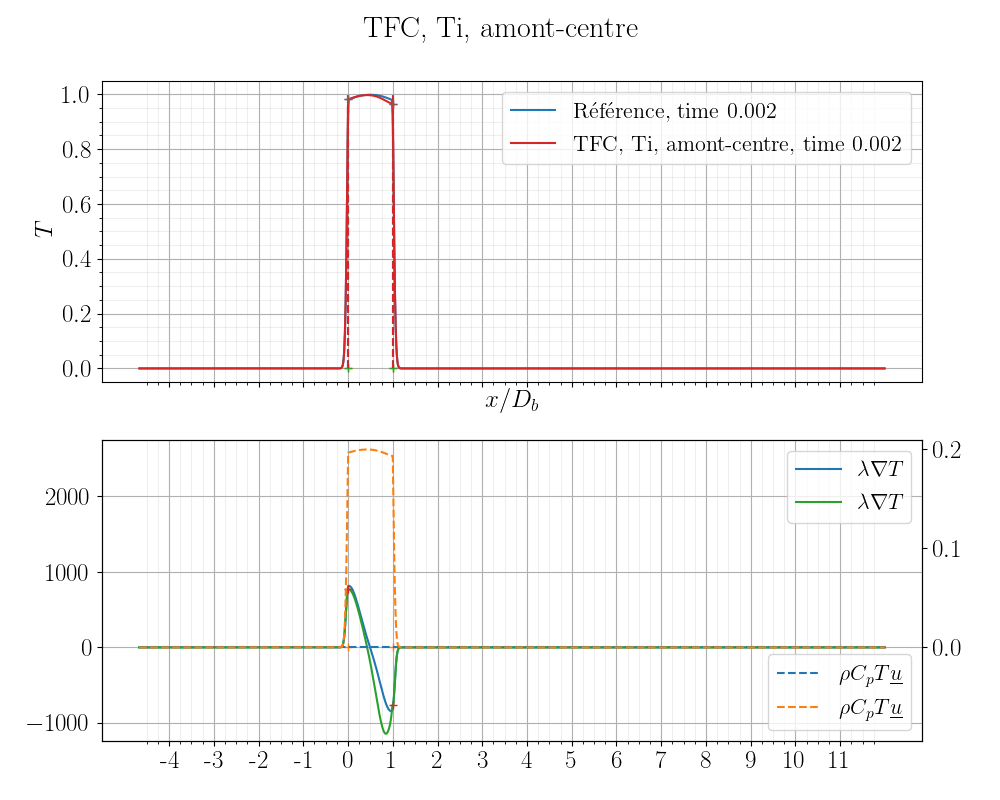

dE*/dt* ref = 1.5437e-06
dt fourier
3.673326886708589e-07
mixte
dE*/dt* = 1.5437e-06
dt fourier
3.673326886708589e-07
Ti
TFC, Ti, quick
dE*/dt* = -3.27552e-07
dt fourier
3.673326886708589e-07
Ti
TFC, Ti, amont-centre
dE*/dt* = -2.6765e-07
coeff :  0.286205648923886
coeff :  0.31593079434553695
coeff :  0.3108975046107064


In [11]:
t_fin = 0.2
plot = Plotter("decale")
plot0 = Plotter(
    "decale", flux_conv=r"$T\underline{u}$", lda_gradT=True, figsize=(10, 8)
)
plot1 = Plotter(
    "decale", flux_conv=r"$\rho C_p T\underline{u}$", lda_gradT=True, figsize=(10, 8)
)
plot2 = Plotter(
    "decale", flux_conv=r"$\rho C_p T\underline{u}$", lda_gradT=True, figsize=(10, 8)
)
# plot3 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
# plot4 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
ax1.set_xlabel(r"$t [s]$")
ax1.set_ylabel(r"$E_{tot} [J/m^3]$")

print("==========================")
prob_ref = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_ref,
    num_prop=num_prop_ref,
    name="Référence",
)
E1 = prob_ref.energy
print(prob_ref.name)
t_ref, e_ref = prob_ref.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=[plot, plot0, plot1, plot2],
)
l = ax1.plot(t_ref, e_ref / (0.02 * 0.005 * 0.005), label=prob_ref.name)

n = len(e_ref)
i0 = int(n / 5)
dedt_adim = (
    (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1
)  # on a mult
print("dE*/dt* ref = %g" % dedt_adim)

print("==========================")
prob0 = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob0.energy
print(prob0.name)
t, e = prob0.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0]
)
dedt_adim_ref = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob0.name)

print("==========================")
prob2 = ProblemDiscontinuT(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
    interp_type="Ti",
    conv_interf="quick",
)
E0 = prob2.energy
print(prob2.name)
t, e = prob2.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1]
)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim)
if abs(dedt_adim) < 1000 * abs(dedt_adim_ref):
    l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob2.name)

print("==========================")
prob2amont = ProblemDiscontinuT(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
    interp_type="Ti",
    conv_interf="amont_centre",
)
E0 = prob2amont.energy
print(prob2amont.name)
t, e = prob2amont.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2]
)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2amont.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim)
if abs(dedt_adim) < 1000 * abs(dedt_adim_ref):
    l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob2amont.name)

for pl in [plot0, plot1, plot2]:
    align_y_axis(pl.ax2, pl.ax3)

# Modif plot énergie

ax1.minorticks_on()
ax1.grid(b=True, which="major")
ax1.grid(b=True, which="minor", alpha=0.2)
# le = fig1.legend()

fig1.canvas.draw()
labels = [item.get_text() for item in ax1.get_yticklabels()]
ticks = list(ax1.get_yticks())
ticks.append(E0 / (0.02 * 0.005**2))
labels.append(r"$E_0$")

ticks = ax1.set_yticks(ticks)
ticklab = ax1.set_yticklabels(labels)

handles, labels = ax1.get_legend_handles_labels()
labels[0] = "TC, " + labels[0]
labels[1] = "TC, " + labels[1]
ax1.legend(handles, labels)
fig1.tight_layout()
if save_fig:
    fig1.savefig(savefig_path + "energie.pdf")

# Modif plot température

handles, labels = plot.ax.get_legend_handles_labels()
labels[0] = "TC, " + labels[0]
labels[1] = "TC, " + labels[1]
plot.ax.legend(handles, labels)
# plot.ax.set_xlabel(r'$x [m]$')
# plot.ax.set_ylabel(r'$T [^{\circ} C]$')
plot.ax.set_xlim(-0.001, 0.0075)
# from tikzplotlib import save
# save(savefig_path + 'temperature.tikz', plot.fig)
# save(savefig_path + 'conservation_energie.tigz', plot4.fig)
if save_fig:
    plot.fig.savefig(savefig_path + "temperature_comparaison_euler_quick.pdf")
    plot1.fig.savefig(savefig_path + "conservation_energie_comparaison_euler_quick.pdf")

# Test des différents opérateurs en WENO avec seulement la convection

In [57]:
n_lim = 65 * 10**0
t_fin_lim = 0.002

In [58]:
phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_ref = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=0.0,
    alpha=0.06,
    a_i=357.0,
)
num_prop = NumericalProperties(
    dx=0.9 * 10**-5,
    schema="quick",
    time_scheme="euler",
    phy_prop=phy_prop,
    cfl=0.5,
    fo=1.0,
)
num_prop_ref = NumericalProperties(
    dx=2.0 * 10**-5,
    schema="quick",
    time_scheme="euler",
    phy_prop=phy_prop,
    cfl=0.5,
    fo=1.0,
)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.005)

<IPython.core.display.Javascript object>


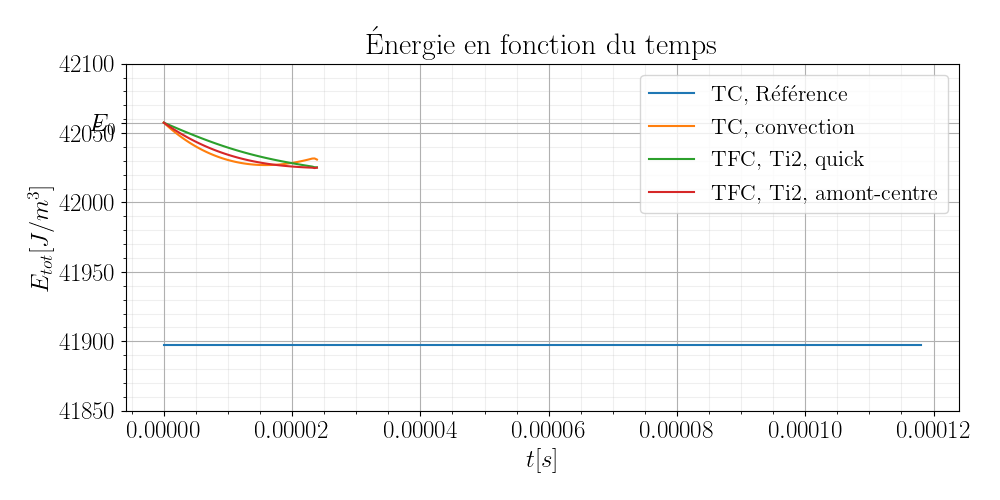

dt fourier
1.8172585062055175e-06
Référence


<IPython.core.display.Javascript object>


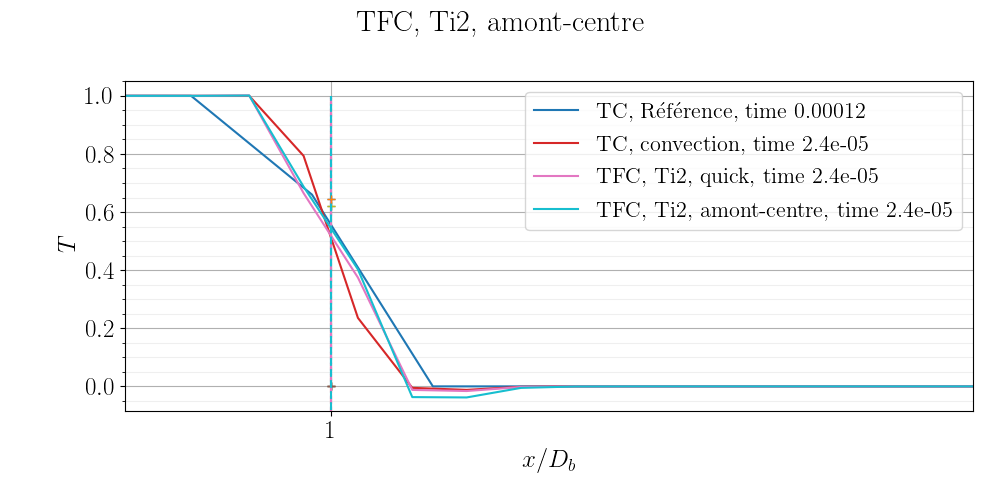

<IPython.core.display.Javascript object>


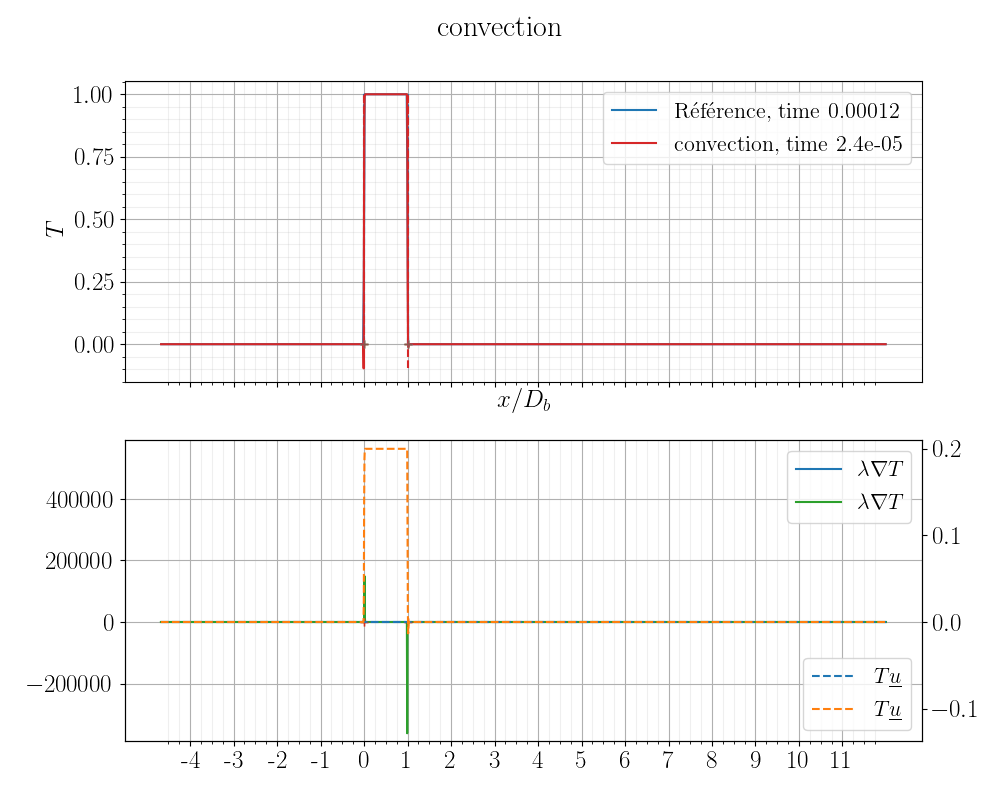

<IPython.core.display.Javascript object>


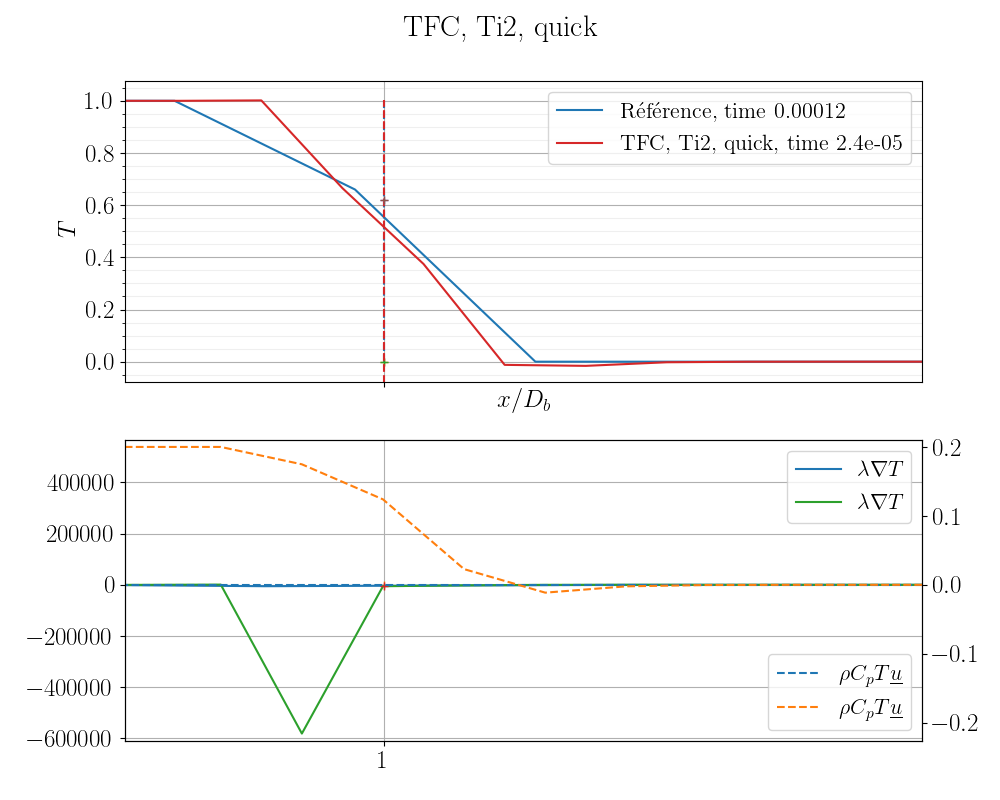

<IPython.core.display.Javascript object>


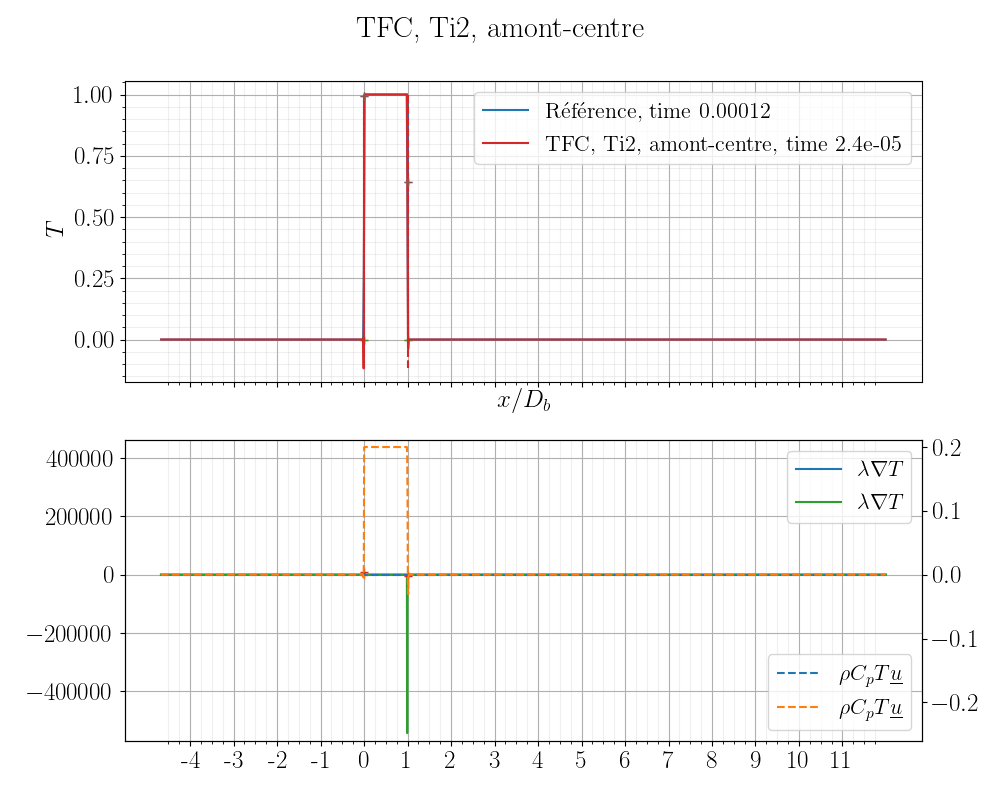

dE*/dt* ref = 0
dt fourier
3.673326886708589e-07
convection
dE*/dt* = 0
dt fourier
3.673326886708589e-07
Ti2
TFC, Ti2, quick
dE*/dt* = -1.04952e-05
dt fourier
3.673326886708589e-07
Ti2
TFC, Ti2, amont-centre
dE*/dt* = -8.79204e-06
coeff :  0.39507982144685067
coeff :  0.5183469363004366
coeff :  0.5520207924519994


In [59]:
t_fin = 0.2
plot = Plotter("decale")
plot0 = Plotter(
    "decale", flux_conv=r"$T\underline{u}$", lda_gradT=True, figsize=(10, 8)
)
plot1 = Plotter(
    "decale", flux_conv=r"$\rho C_p T\underline{u}$", lda_gradT=True, figsize=(10, 8)
)
plot2 = Plotter(
    "decale", flux_conv=r"$\rho C_p T\underline{u}$", lda_gradT=True, figsize=(10, 8)
)
# plot3 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))
# plot4 = Plotter('decale', flux_conv=r'$\rho C_p T\underline{u}$', lda_gradT=True, figsize=(10,8))

fig1, ax1 = plt.subplots(1)
ax1.set_title("Énergie en fonction du temps")
ax1.set_xlabel(r"$t [s]$")
ax1.set_ylabel(r"$E_{tot} [J/m^3]$")

print("==========================")
prob_ref = Problem(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop_ref,
    num_prop=num_prop_ref,
    name="Référence",
)
E1 = prob_ref.energy
print(prob_ref.name)
t_ref, e_ref = prob_ref.timestep(
    t_fin=min(t_fin, t_fin_lim),
    n=n_lim,
    number_of_plots=1,
    plotter=[plot, plot0, plot1, plot2],
)
l = ax1.plot(t_ref, e_ref / (0.02 * 0.005 * 0.005), label=prob_ref.name)

n = len(e_ref)
i0 = int(n / 5)
dedt_adim = (
    (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1
)  # on a mult
print("dE*/dt* ref = %g" % dedt_adim)

print("==========================")
prob0 = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop)
E0 = prob0.energy
print(prob0.name)
t, e = prob0.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0]
)
dedt_adim_ref = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob0.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim)
l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob0.name)

print("==========================")
prob2 = ProblemDiscontinuT(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
    interp_type="Ti2",
    conv_interf="quick",
)
E0 = prob2.energy
print(prob2.name)
t, e = prob2.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1]
)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim)
if abs(dedt_adim) < 1000 * abs(dedt_adim_ref):
    l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob2.name)

print("==========================")
prob2amont = ProblemDiscontinuT(
    get_T_creneau,
    markers=markers,
    phy_prop=phy_prop,
    num_prop=num_prop,
    interp_type="Ti2",
    conv_interf="amont_centre",
)
E0 = prob2amont.energy
print(prob2amont.name)
t, e = prob2amont.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2]
)

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2amont.dt / E0  # on a mult
print("dE*/dt* = %g" % dedt_adim)
if abs(dedt_adim) < 1000 * abs(dedt_adim_ref):
    l = ax1.plot(t, e / (0.02 * 0.005 * 0.005), label=prob2amont.name)

for pl in [plot0, plot1, plot2]:
    align_y_axis(pl.ax2, pl.ax3)

# Modif plot énergie

ax1.minorticks_on()
ax1.grid(b=True, which="major")
ax1.grid(b=True, which="minor", alpha=0.2)
# le = fig1.legend()

fig1.canvas.draw()
labels = [item.get_text() for item in ax1.get_yticklabels()]
ticks = list(ax1.get_yticks())
ticks.append(E0 / (0.02 * 0.005**2))
labels.append(r"$E_0$")

ticks = ax1.set_yticks(ticks)
ticklab = ax1.set_yticklabels(labels)

handles, labels = ax1.get_legend_handles_labels()
labels[0] = "TC, " + labels[0]
labels[1] = "TC, " + labels[1]
ax1.legend(handles, labels)
fig1.tight_layout()
if save_fig:
    fig1.savefig(savefig_path + "energie.pdf")

# Modif plot température

handles, labels = plot.ax.get_legend_handles_labels()
labels[0] = "TC, " + labels[0]
labels[1] = "TC, " + labels[1]
plot.ax.legend(handles, labels)
# plot.ax.set_xlabel(r'$x [m]$')
# plot.ax.set_ylabel(r'$T [^{\circ} C]$')
plot.ax.set_xlim(-0.001, 0.0075)
# from tikzplotlib import save
# save(savefig_path + 'temperature.tikz', plot.fig)
# save(savefig_path + 'conservation_energie.tigz', plot4.fig)
if save_fig:
    plot.fig.savefig(savefig_path + "temperature_comparaison_euler_quick.pdf")
    plot1.fig.savefig(savefig_path + "conservation_energie_comparaison_euler_quick.pdf")